In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.637813,-1.612297,1.411161,-0.845807,1.215817,1
1,-0.196507,0.761633,0.487169,-2.094859,0.468900,0
2,-0.564047,0.584336,-2.040256,-2.207828,-1.572082,0
3,1.446379,1.966534,-1.421583,-1.932774,1.595333,0
4,0.017717,0.485722,-1.390844,-2.835873,-0.589364,0


In [5]:
bag= BaggingClassifier(max_features = 2)

In [7]:
bag.fit(df.iloc[:,:5] , df.iloc[:,-1])

BaggingClassifier(max_features=2)

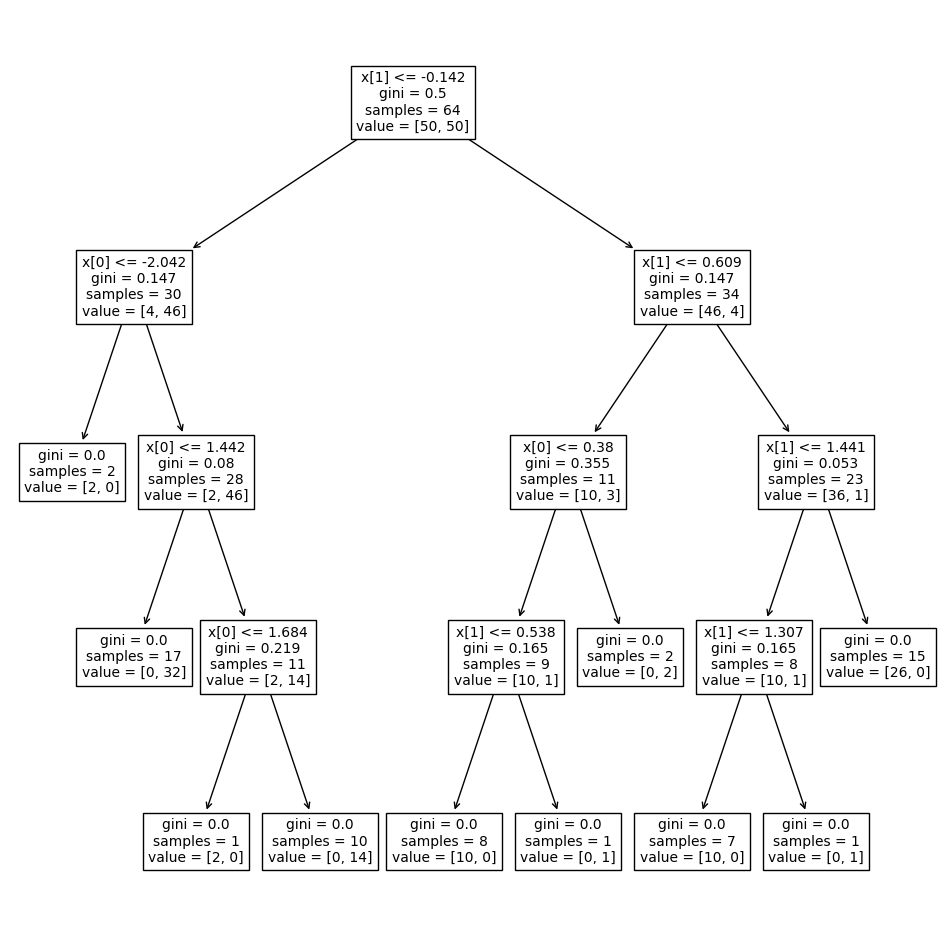

In [8]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

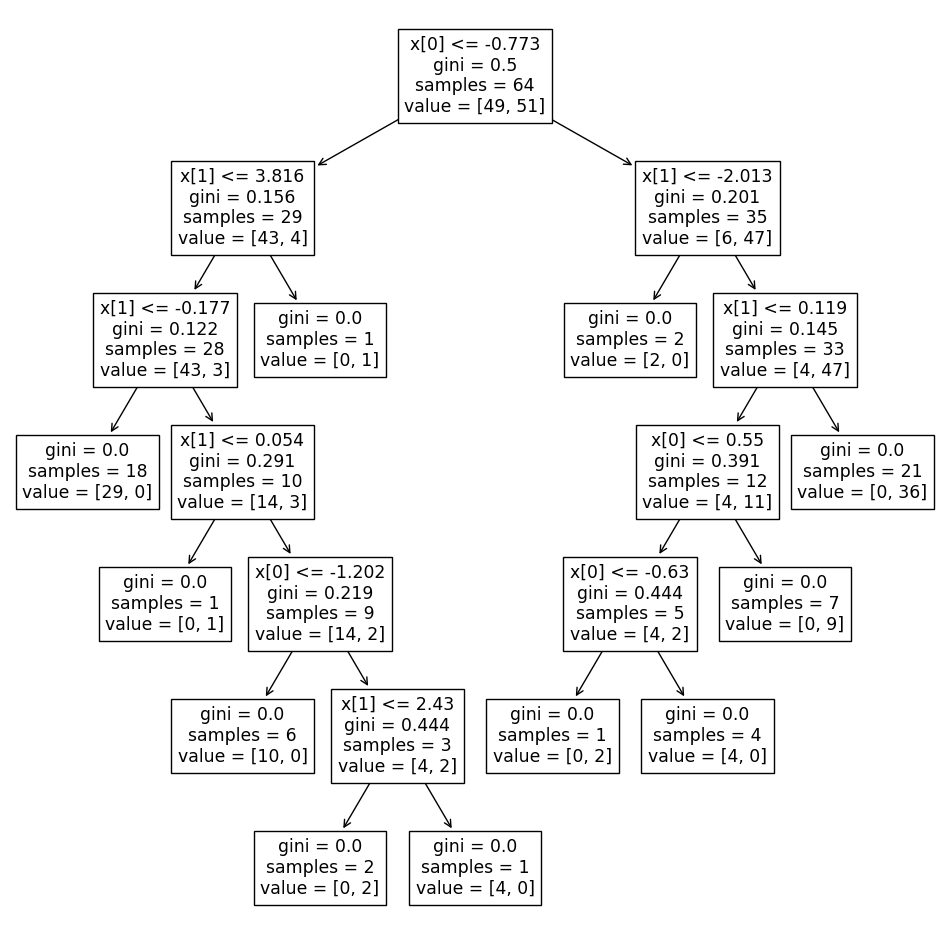

In [9]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[1])
plt.show()

here you can see only first 2 column are used in each split , bagging do column sampling in tree level or in the begging , so less random as campare to random forest

In [14]:
print(len(bag.estimators_))
bag.estimators_

10


[DecisionTreeClassifier(random_state=1585823178),
 DecisionTreeClassifier(random_state=1816063347),
 DecisionTreeClassifier(random_state=228909335),
 DecisionTreeClassifier(random_state=1653713605),
 DecisionTreeClassifier(random_state=2135720683),
 DecisionTreeClassifier(random_state=1291699265),
 DecisionTreeClassifier(random_state=1372013192),
 DecisionTreeClassifier(random_state=1308491473),
 DecisionTreeClassifier(random_state=1990986206),
 DecisionTreeClassifier(random_state=463740786)]

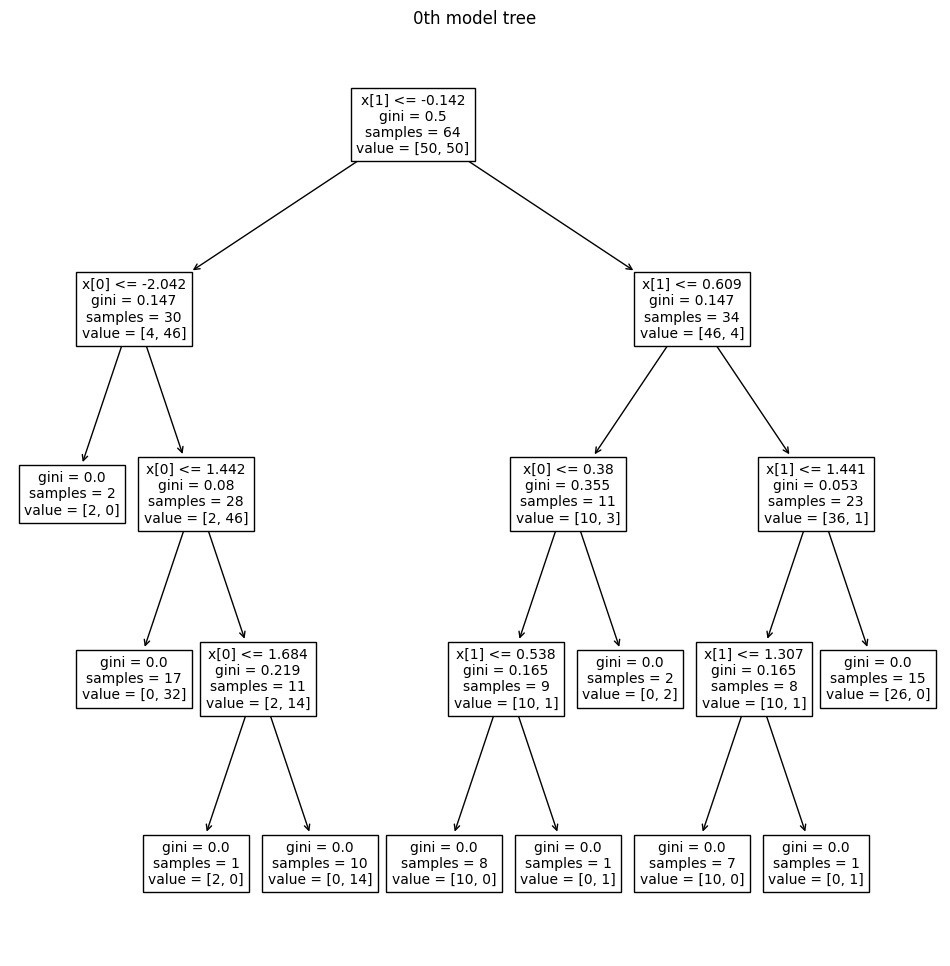

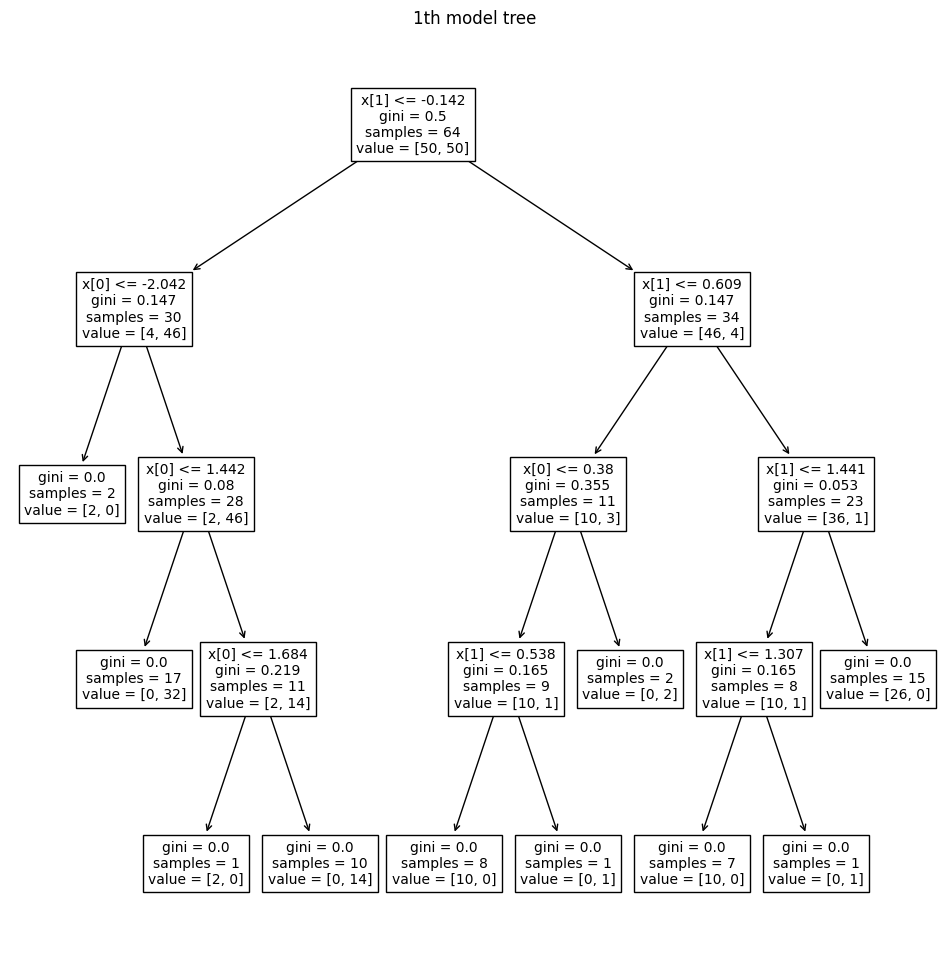

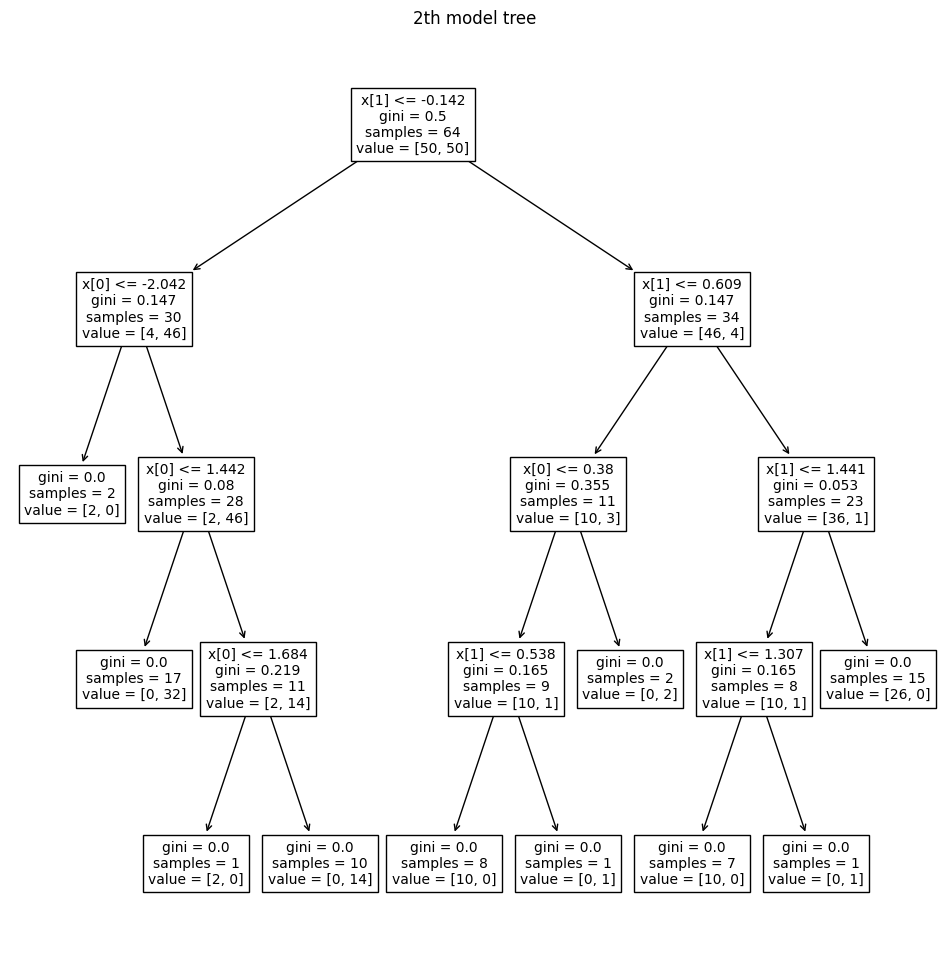

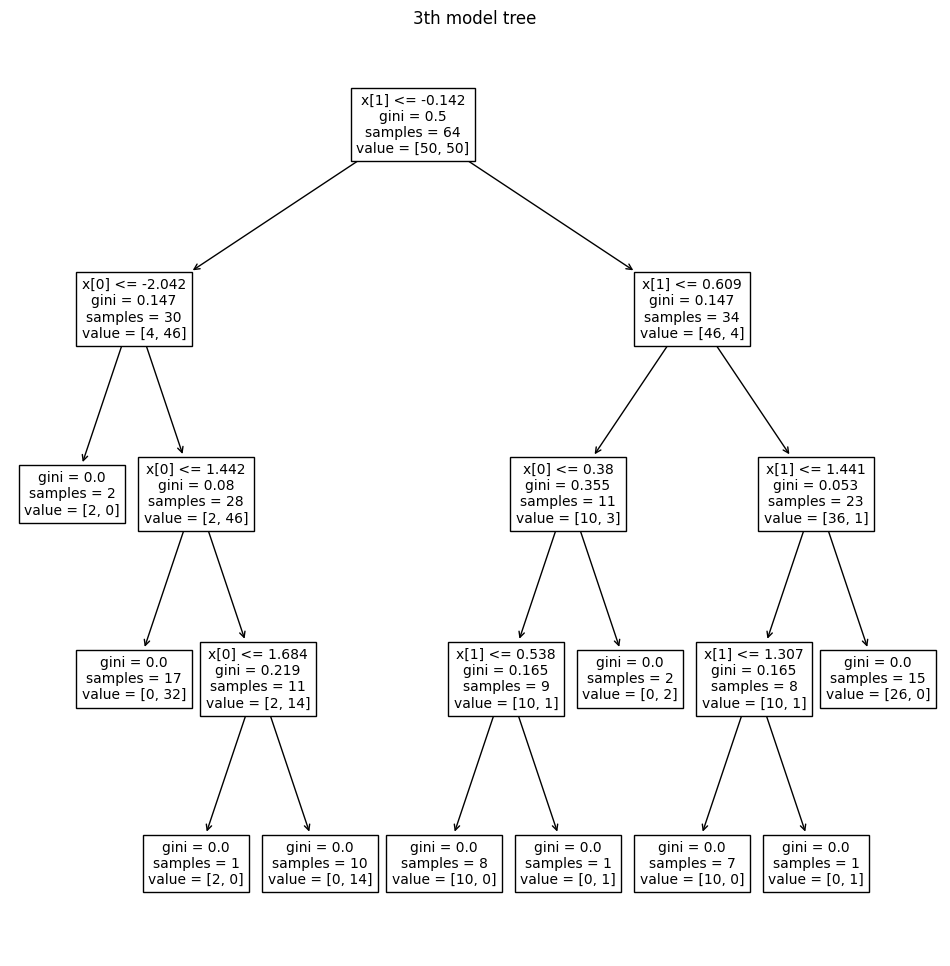

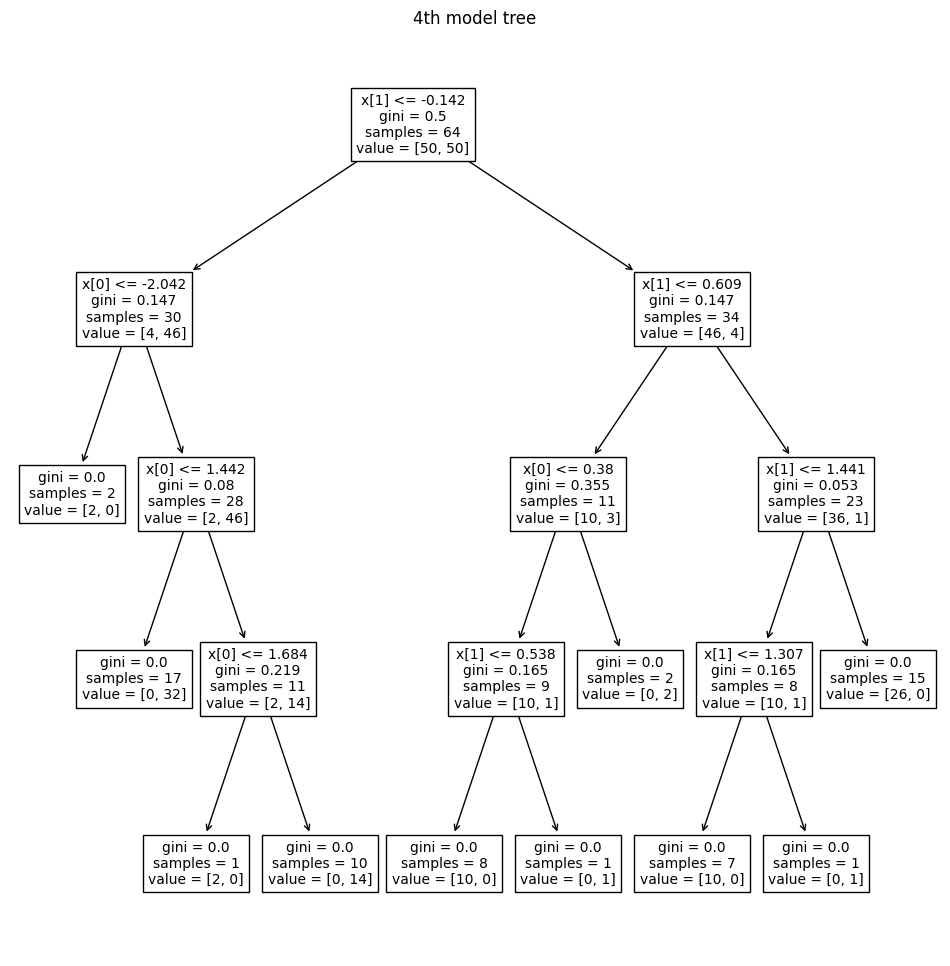

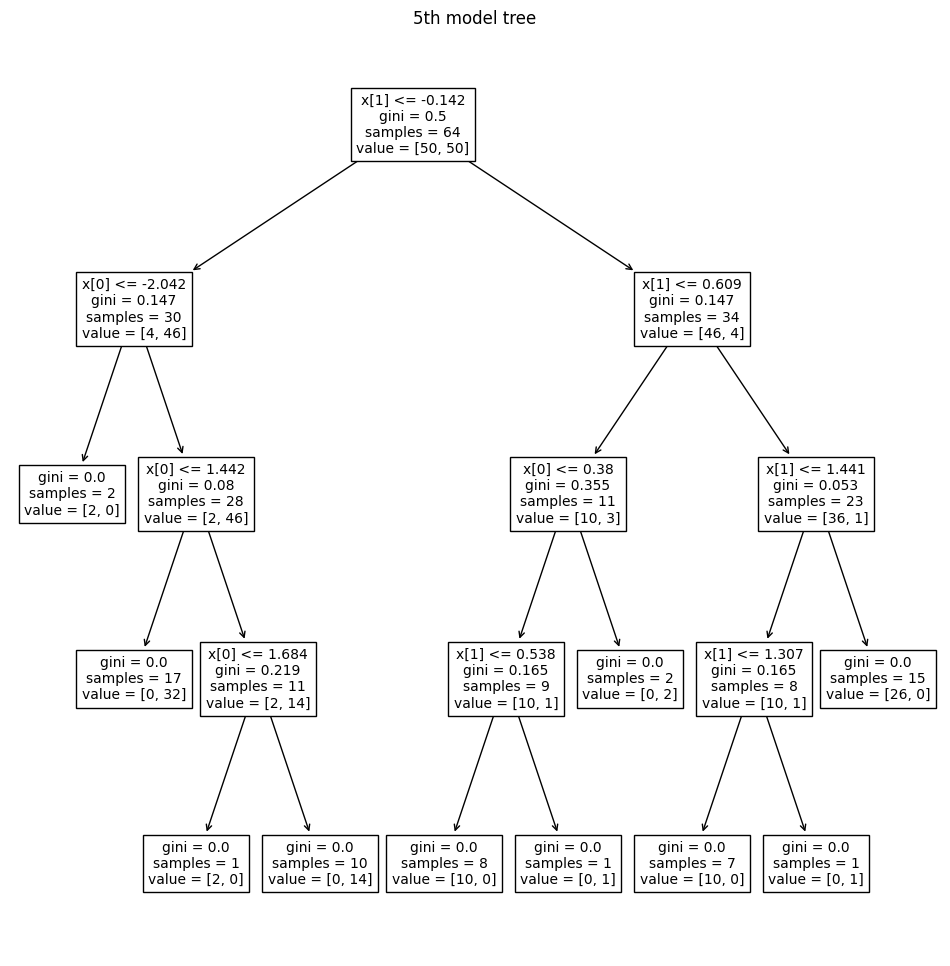

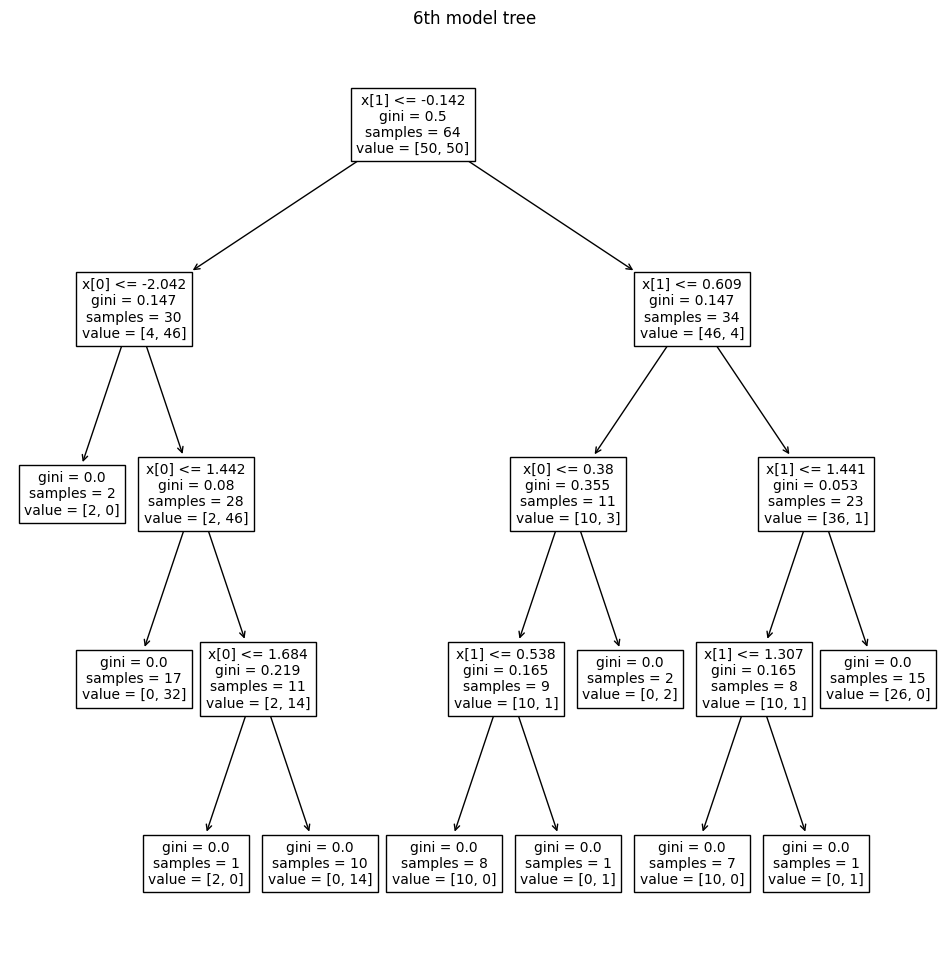

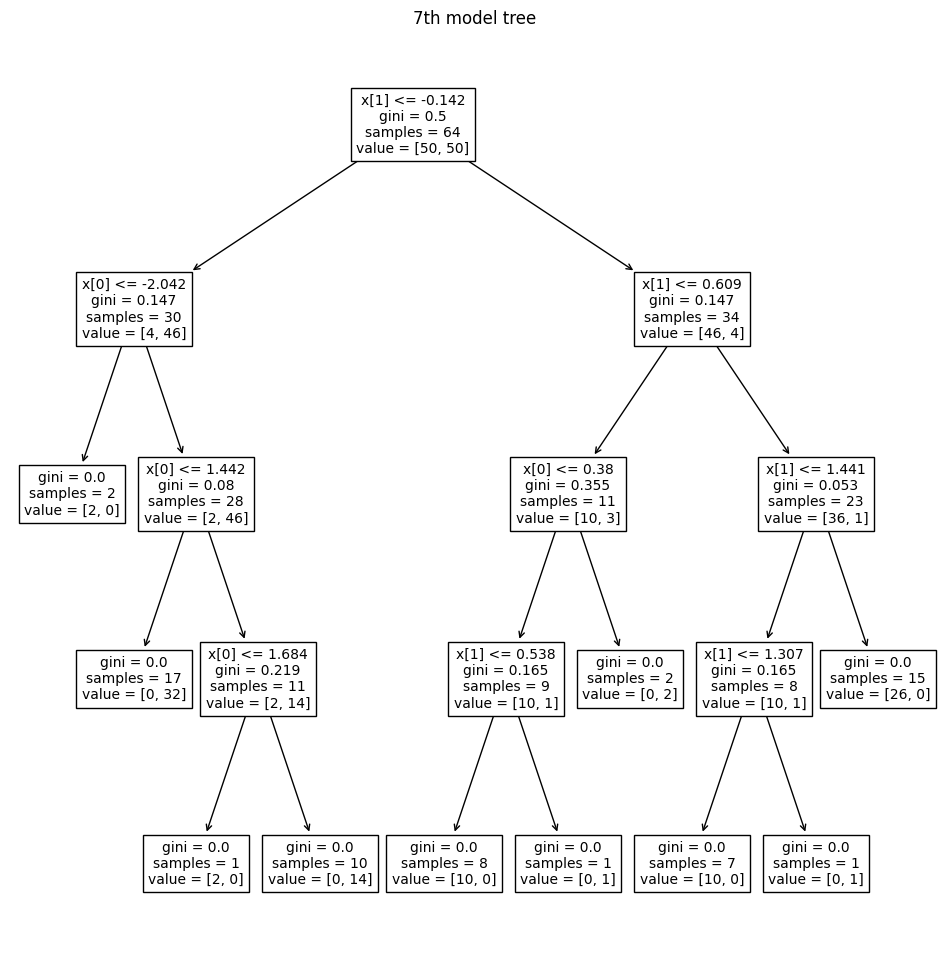

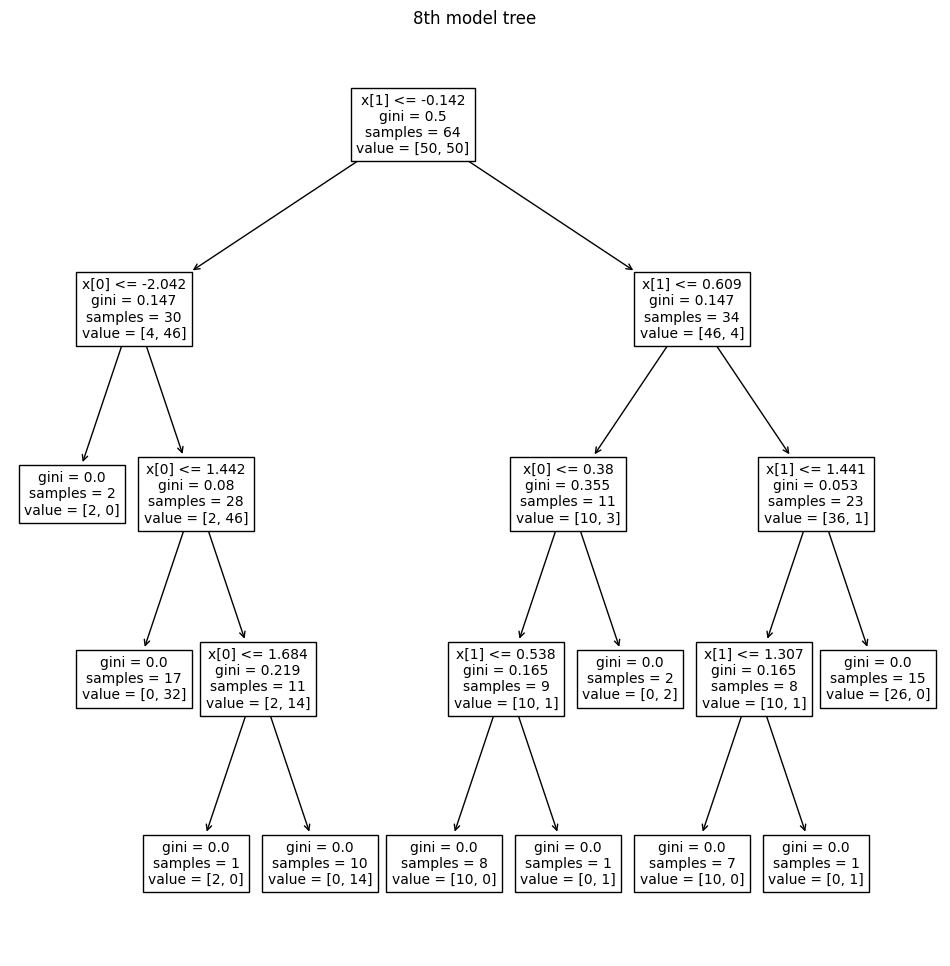

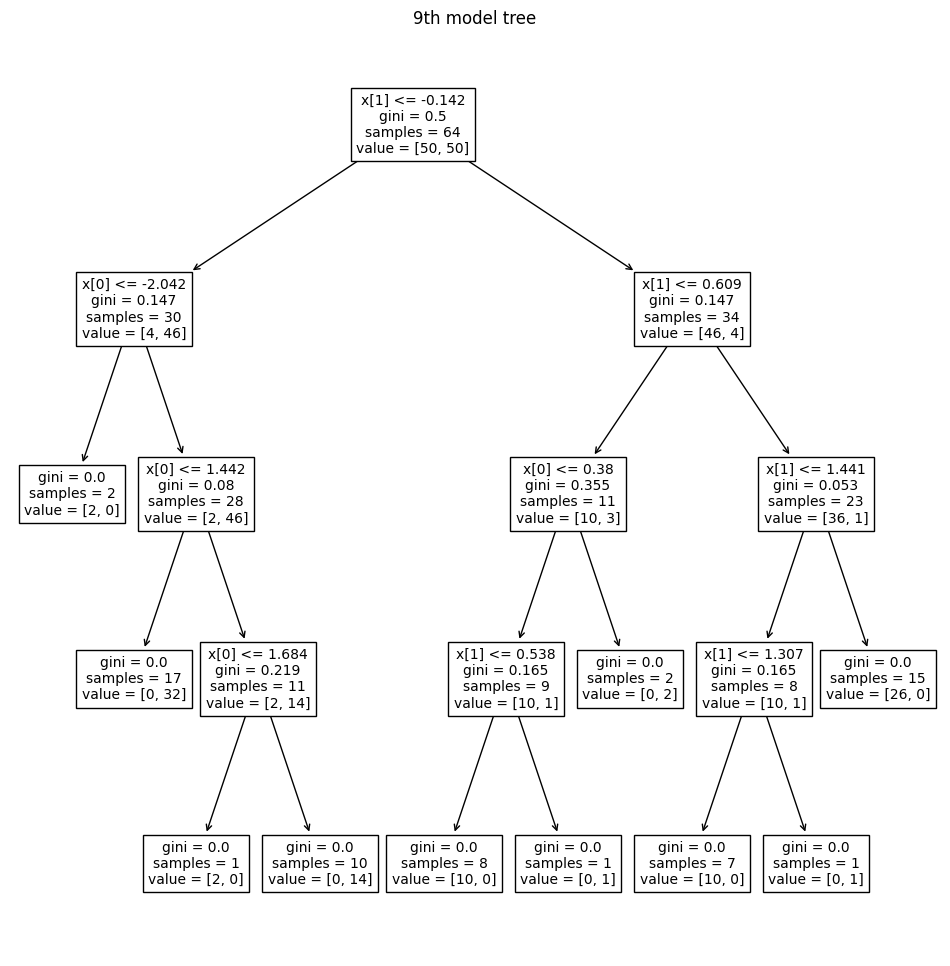

In [15]:
for i in range(10):
  plt.figure(figsize=(12,12))
  plot_tree(bag.estimators_[0])
  plt.title(f'{i}th model tree')
  plt.show()

In [16]:
rf = RandomForestClassifier(max_features=2)

In [17]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(max_features=2)

In [21]:
len(rf.estimators_)

100

In [22]:
rf.estimators_

[DecisionTreeClassifier(max_features=2, random_state=222289808),
 DecisionTreeClassifier(max_features=2, random_state=2021486283),
 DecisionTreeClassifier(max_features=2, random_state=516088050),
 DecisionTreeClassifier(max_features=2, random_state=2079728720),
 DecisionTreeClassifier(max_features=2, random_state=1264403829),
 DecisionTreeClassifier(max_features=2, random_state=307420364),
 DecisionTreeClassifier(max_features=2, random_state=525512739),
 DecisionTreeClassifier(max_features=2, random_state=1671793508),
 DecisionTreeClassifier(max_features=2, random_state=854231859),
 DecisionTreeClassifier(max_features=2, random_state=1548164594),
 DecisionTreeClassifier(max_features=2, random_state=2049995805),
 DecisionTreeClassifier(max_features=2, random_state=2082667924),
 DecisionTreeClassifier(max_features=2, random_state=1617597730),
 DecisionTreeClassifier(max_features=2, random_state=959354764),
 DecisionTreeClassifier(max_features=2, random_state=344485153),
 DecisionTreeClas

In [26]:
# for all model's tree   it take too much time

# for i in range(100):
#   plt.figure(figsize=(12,12))
#   plot_tree(rf.estimators_[0])
#   plt.title(f'{i}th model tree')
#   plt.show()

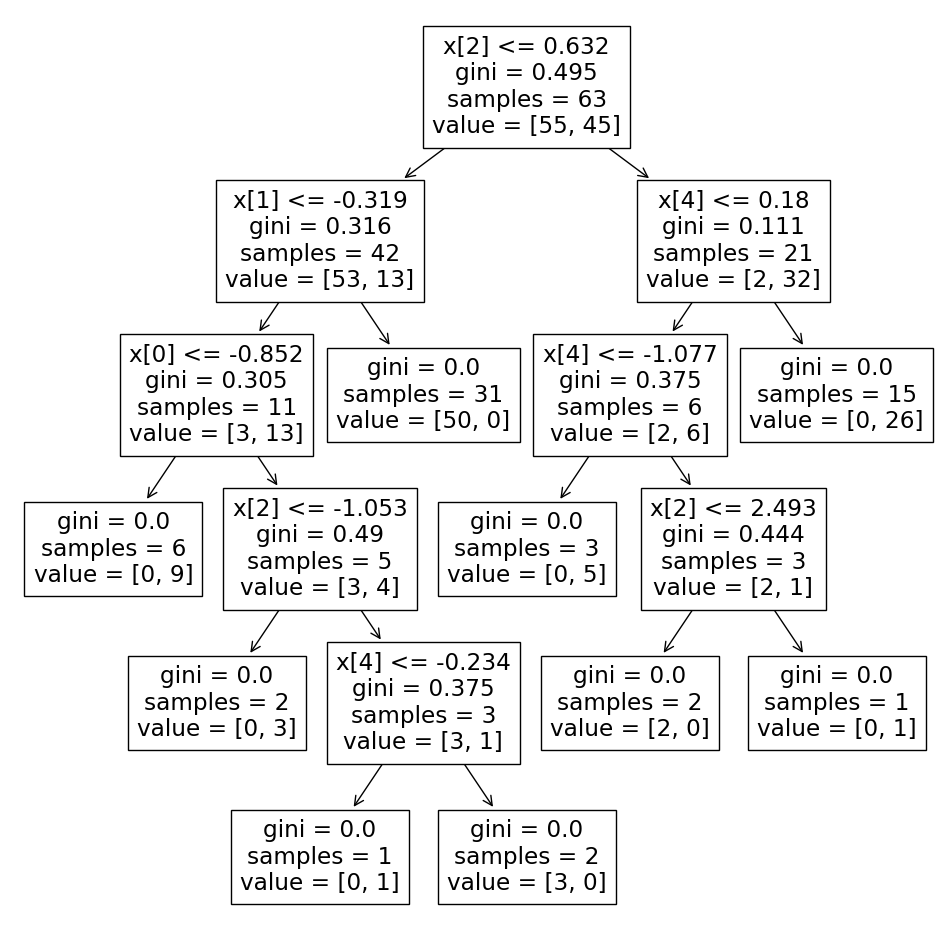

In [27]:
# ploting one random decision tree
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()

here you can view all the column being used because random forest do column samlping on note level or spliting time so this will give more random data